In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
#gakusah run
from google.colab import drive
drive.mount('/content/drive')

import os

dataset_path = '/content/drive/My Drive/nyoba'

os.chdir(dataset_path)

HOME = os.getcwd()
print("Current working directory:", HOME)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/My Drive/nyoba


In [ ]:
#library untuk YOLOV8
!pip install ultralytics==8.0.196 --quiet
print('done')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 62.2 MB/s eta 0:00:00
done


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8bj5K7MdW6N10RhnTeJi")
project = rf.workspace("universitas-widya-gama").project("bismillah-skripsi-twcqn")
version = project.version(1)
dataset = version.download("yolov8")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO

from IPython.display import display,Image

In [ ]:
#gakusah run
!pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=800

/content/drive/My Drive/nyoba
100% 21.5M/21.5M [00:00<00:00, 141MB/s]
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/nyoba/Bismillah-Skripsi-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

In [ ]:
#MULAI RUN
#Library Machine Learning untuk mengelola data dan perhitungan gradien
import torch
import os #directory
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #menampilkan gambar


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
model_path = 'runs/detect/train/weights/best.pt'

In [ ]:
from ultralytics import YOLO
model = YOLO(model_path)

In [ ]:
from collections import defaultdict

In [ ]:
def get_bounding_boxes(dataset_path, model):
    bounding_boxes = {'Umur 2 Bulan': [], 'Umur 3-4 Bulan': [], 'Umur 5-6 Bulan': []}
    image_files = os.listdir(dataset_path)
    total_images = len(image_files)

    for idx, image_file in enumerate(image_files):
        image_path = os.path.join(dataset_path, image_file)
        print(f"Processing image {idx + 1}/{total_images}: {image_file}")
        results = model.predict(image_path)

        for result in results:
            for box in result.boxes.xyxy:
                x_min, y_min, x_max, y_max = map(int, box[:4])
                class_name = result.names[int(result.boxes.cls[0])]

                if class_name in bounding_boxes:
                    if class_name == 'Umur 2 Bulan':
                        bounding_boxes[class_name].append((x_min+50, y_min+50, x_max, y_max))
                    elif class_name == 'Umur 3-4 Bulan':
                        bounding_boxes[class_name].append((x_min, y_min, x_max, y_max))
                    else:
                        bounding_boxes[class_name].append((x_min-50, y_min-50, x_max, y_max))

    return bounding_boxes

In [ ]:
# Fungsi untuk menghitung rata-rata lebar dan tinggi bounding box dan mencetak koordinat
# kiri = xmin
# bawah = ymin
# kanan = xmax
# atas = ymax

def calculate_and_print_bounding_box(bounding_boxes):
    for age_group, boxes in bounding_boxes.items():
        print(f"{age_group}:")

        for box in boxes:
            x_min, y_min, x_max, y_max = box
            width = x_max - x_min
            height = y_max - y_min

            print(f"Koordinat kiri atas ({x_min}, {y_min}) dan kanan bawah ({x_max}, {y_max}), maka:")
            print(f"Lebar = {width} piksel")
            print(f"Tinggi = {height} piksel")
            print()

In [ ]:
def calculate_average_bounding_box(bounding_boxes):
    averages = {}
    for age_group, boxes in bounding_boxes.items():
        if boxes:
            widths = [x_max - x_min for (x_min, y_min, x_max, y_max) in boxes]
            heights = [y_max - y_min for (x_min, y_min, x_max, y_max) in boxes]
            avg_width = np.mean(widths)
            avg_height = np.mean(heights)
            averages[age_group] = (avg_width, avg_height)
        else:
            averages[age_group] = (0, 0)  # Jika tidak ada bounding box, nilai rata-rata adalah 0
    return averages

In [ ]:
def calculate_average_xyxy(bounding_boxes):
    averages = {}
    for age_group, boxes in bounding_boxes.items():
        if boxes:
            x_mins = [x_min for (x_min, y_min, x_max, y_max) in boxes]
            y_mins = [y_min for (x_min, y_min, x_max, y_max) in boxes]
            x_maxes = [x_max for (x_min, y_min, x_max, y_max) in boxes]
            y_maxes = [y_max for (x_min, y_min, x_max, y_max) in boxes]

            avg_x_mins = np.mean(x_mins)
            avg_y_mins = np.mean(y_mins)
            avg_x_maxes = np.mean(x_maxes)
            avg_y_maxes = np.mean(y_maxes)
            averages[age_group] = (avg_x_mins, avg_y_mins, avg_x_maxes, avg_y_maxes)
        else:
            averages[age_group] = (0, 0, 0, 0)  # Jika tidak ada bounding box, nilai rata-rata adalah 0
    return averages


In [ ]:
def calculate_bounding_box_area_min_max(bounding_boxes):
    areas_min_max = {}
    for age_group, boxes in bounding_boxes.items():
        if boxes:
            widths = [x_max - x_min for (x_min, y_min, x_max, y_max) in boxes]
            heights = [y_max - y_min for (x_min, y_min, x_max, y_max) in boxes]
            areas = [width*height for (width,height) in zip(widths, heights)]
            area_min = min(areas)
            area_max = max(areas)
            areas_min_max[age_group] = (area_min, area_max)
        else:
            areas_min_max[age_group] = (0, 0)  # Jika tidak ada bounding box, nilai width atau height adalah 0
    return areas_min_max

In [ ]:
import os

test_images_path='/content/drive/My Drive/nyoba/Bismillah-Skripsi-1/test/images'

if os.path.exists(test_images_path):
    print("Path exists")
else:
    print("Path does not exist")


Path exists


In [ ]:
test_images_path = '/content/drive/My Drive/nyoba/Bismillah-Skripsi-1/test/images'

In [ ]:
bounding_boxes = get_bounding_boxes(test_images_path, model)

Processing image 1/74: Training_mp4-116_jpg.rf.1ef2bc197142db28164ca8b2135a7e1d.jpg


ImportError: cannot import name 'default_class_names' from 'ultralytics.nn.autobackend' (/usr/local/lib/python3.10/dist-packages/ultralytics/nn/autobackend.py)

In [ ]:
calculate_and_print_bounding_box(bounding_boxes)

Umur 2 Bulan:
Koordinat kiri atas (90, 173) dan kanan bawah (276, 437), maka:
Lebar = 186 piksel
Tinggi = 264 piksel

Koordinat kiri atas (291, 154) dan kanan bawah (468, 423), maka:
Lebar = 177 piksel
Tinggi = 269 piksel

Koordinat kiri atas (181, 0) dan kanan bawah (396, 220), maka:
Lebar = 215 piksel
Tinggi = 220 piksel

Koordinat kiri atas (132, 330) dan kanan bawah (395, 638), maka:
Lebar = 263 piksel
Tinggi = 308 piksel

Koordinat kiri atas (141, 172) dan kanan bawah (292, 409), maka:
Lebar = 151 piksel
Tinggi = 237 piksel

Koordinat kiri atas (214, 342) dan kanan bawah (455, 637), maka:
Lebar = 241 piksel
Tinggi = 295 piksel

Koordinat kiri atas (342, 147) dan kanan bawah (496, 428), maka:
Lebar = 154 piksel
Tinggi = 281 piksel

Koordinat kiri atas (211, 0) dan kanan bawah (428, 188), maka:
Lebar = 217 piksel
Tinggi = 188 piksel

Koordinat kiri atas (143, 175) dan kanan bawah (296, 411), maka:
Lebar = 153 piksel
Tinggi = 236 piksel

Koordinat kiri atas (218, 345) dan kanan bawah

In [ ]:
# Menghitung rata-rata ukuran bounding box per kategori umur
average_boxes = calculate_average_bounding_box(bounding_boxes)

In [ ]:
# Menghitung rata-rata ukuran setiap titik koordinat
average_coordinates = calculate_average_xyxy(bounding_boxes)

# Menampilkan hasil rata-rata
for age_group, (avg_x_min, avg_y_min, avg_x_maxes, avg_y_maxes) in average_coordinates.items():
    print(f"Rata-rata untuk {age_group}:")
    print(f"rata_kiri = {avg_x_min:.2f}")
    print(f"rata_bawah = {avg_y_min:.2f}")
    print(f"rata_kanan = {avg_x_maxes:.2f}")
    print(f"rata_atas = {avg_y_maxes:.2f}")

Rata-rata untuk Umur 2 Bulan:
rata_kiri = 197.61
rata_atas = 161.68
rata_kanan = 402.57
rata_bawah = 425.46
Rata-rata untuk Umur 3-4 Bulan:
rata_kiri = 209.94
rata_atas = 155.13
rata_kanan = 414.11
rata_bawah = 429.41
Rata-rata untuk Umur 5-6 Bulan:
rata_kiri = 184.07
rata_atas = 156.22
rata_kanan = 399.61
rata_bawah = 432.93


In [ ]:
# Menampilkan hasil rata-rata
for age_group, (avg_width, avg_height) in average_boxes.items():
    print(f"Rata-rata untuk {age_group}:")
    print(f"Lebar = {avg_width:.2f} piksel")
    print(f"Tinggi = {avg_height:.2f} piksel\n")

Rata-rata untuk Umur 2 Bulan:
Lebar = 204.96 piksel
Tinggi = 263.79 piksel

Rata-rata untuk Umur 3-4 Bulan:
Lebar = 204.16 piksel
Tinggi = 274.28 piksel

Rata-rata untuk Umur 5-6 Bulan:
Lebar = 215.55 piksel
Tinggi = 276.72 piksel



In [ ]:
# Menghitung area(Luas) bounding box untuk setiap kelas(age_group) diambil area min dan area max nya
min_max_areas = calculate_bounding_box_area_min_max(bounding_boxes)

In [ ]:
# Menampilkan rentang luas bounding box untuk setiap kelas(age_group)
for age_group, (area_min,area_max) in min_max_areas.items():
    print(f"Rentang luas untuk {age_group} (px^2): {area_min} - {area_max}")
    print()

Rentang luas untuk Umur 2 Bulan (px^2): 34960 - 82276

Rentang luas untuk Umur 3-4 Bulan (px^2): 34866 - 87308

Rentang luas untuk Umur 5-6 Bulan (px^2): 35015 - 83080



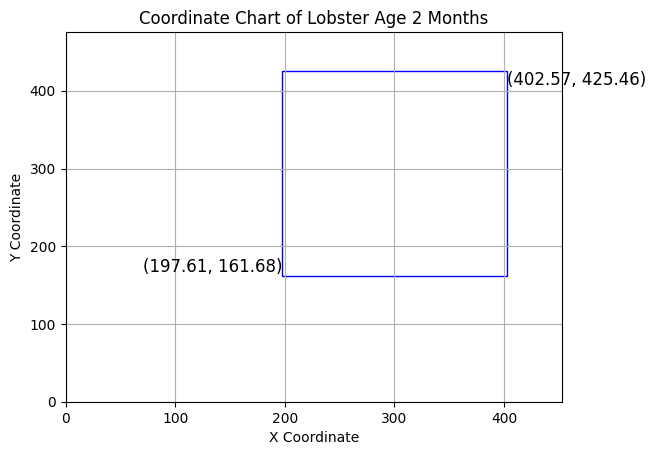

In [ ]:

# Koordinat rata-rata 2 bulan
rata_kiri = 197.61
rata_atas = 161.68
rata_kanan = 402.57
rata_bawah = 425.46

# Menghitung lebar dan tinggi
lebar = rata_kanan - rata_kiri
tinggi = rata_bawah - rata_atas

# Plotting the rectangle
fig, ax = plt.subplots()
rectangle = plt.Rectangle((rata_kiri, rata_atas), lebar, tinggi, edgecolor='blue', facecolor='none')
ax.add_patch(rectangle)

# Setting the limits of the plot
plt.xlim(0, rata_kanan + 50)
plt.ylim(0, rata_bawah + 50)

# Adding labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Coordinate Chart of Lobster Age 2 Months')

# Adding text annotations for the coordinates
plt.text(rata_kiri, rata_atas, f'({rata_kiri}, {rata_atas})', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(rata_kanan, rata_bawah, f'({rata_kanan}, {rata_bawah})', fontsize=12, verticalalignment='top', horizontalalignment='left')

# Displaying the plot
plt.grid(True)
plt.show()

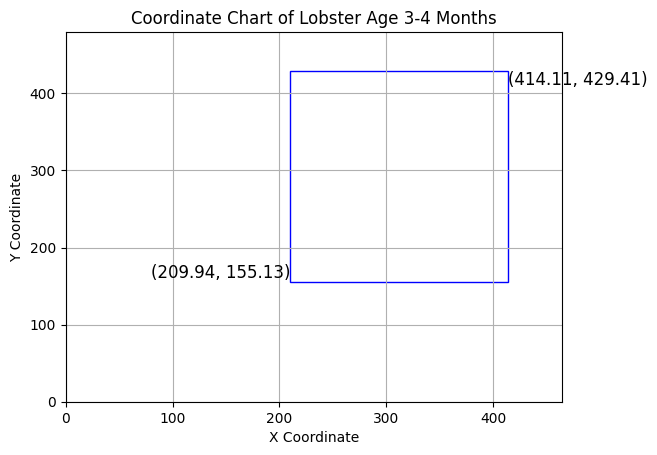

In [ ]:
# Koordinat rata-rata 3-4 Bulan bulan
rata_kiri = 209.94
rata_atas = 155.13
rata_kanan = 414.11
rata_bawah = 429.41

# Menghitung lebar dan tinggi
lebar = rata_kanan - rata_kiri
tinggi = rata_bawah - rata_atas

# Plotting the rectangle
fig, ax = plt.subplots()
rectangle = plt.Rectangle((rata_kiri, rata_atas), lebar, tinggi, edgecolor='blue', facecolor='none')
ax.add_patch(rectangle)

# Setting the limits of the plot
plt.xlim(0, rata_kanan + 50)
plt.ylim(0, rata_bawah + 50)

# Adding labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Coordinate Chart of Lobster Age 3-4 Months')

# Adding text annotations for the coordinates
plt.text(rata_kiri, rata_atas, f'({rata_kiri}, {rata_atas})', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(rata_kanan, rata_bawah, f'({rata_kanan}, {rata_bawah})', fontsize=12, verticalalignment='top', horizontalalignment='left')

# Displaying the plot
plt.grid(True)
plt.show()

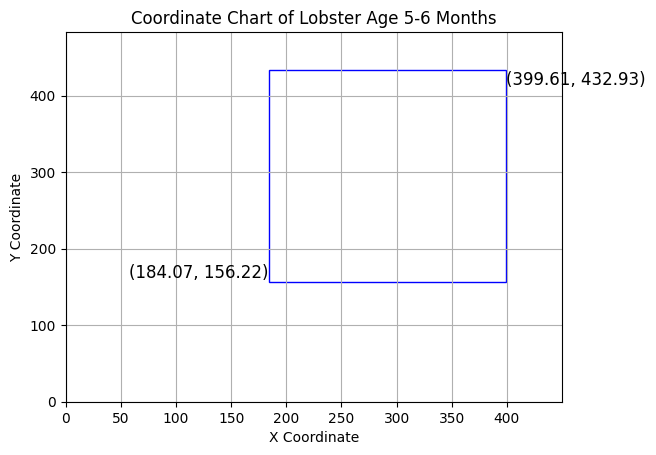

In [ ]:
# Koordinat rata-rata 3-4 Bulan bulan
rata_kiri = 184.07
rata_atas = 156.22
rata_kanan = 399.61
rata_bawah = 432.93

# Menghitung lebar dan tinggi
lebar = rata_kanan - rata_kiri
tinggi = rata_bawah - rata_atas

# Plotting the rectangle
fig, ax = plt.subplots()
rectangle = plt.Rectangle((rata_kiri, rata_atas), lebar, tinggi, edgecolor='blue', facecolor='none')
ax.add_patch(rectangle)

# Setting the limits of the plot
plt.xlim(0, rata_kanan + 50)
plt.ylim(0, rata_bawah + 50)

# Adding labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Coordinate Chart of Lobster Age 5-6 Months')

# Adding text annotations for the coordinates
plt.text(rata_kiri, rata_atas, f'({rata_kiri}, {rata_atas})', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(rata_kanan, rata_bawah, f'({rata_kanan}, {rata_bawah})', fontsize=12, verticalalignment='top', horizontalalignment='left')

# Displaying the plot
plt.grid(True)
plt.show()